# 强化学习基本概念

本章主要讲解强化学习中的核心概念，包括状态（state）、动作（action）、奖励（reward）、回报（return）、回合（episode）、策略（policy）等。

## Grid World 示例

在本课程中，我们广泛使用 **Grid World** 作为示例场景，因为它简单直观，易于理解。

- 机器人在不同的网格（grid）中移动。
- 网格有不同的状态：可访问（Accessible）、禁止（forbidden）、目标（target）以及地图边界（boundary）。

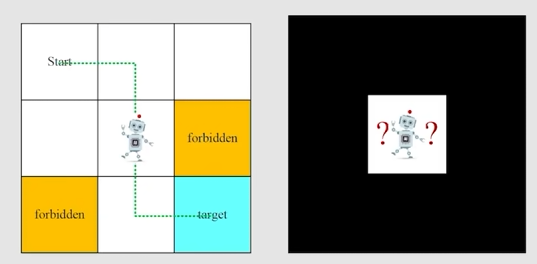

### 目标与路径优化

在示例中，机器人需要找到一条“好”的路径到达目标（target）。如何定义“好”的路径？

- 路径短
- 避免障碍
- 远离边界

## 核心概念详解

下面我们将逐步介绍强化学习中的基本概念。

### State（状态）

**State** 表示智能体（agent）在环境中的当前状态。

- 在 Grid World 中，状态就是机器人的位置，例如 $s_1, s_2, \dots, s_9$。
- **State Space（状态空间）**：所有可能状态的集合，记为 $S = \{s_i\}_{i=1}^9$。

### Action（动作）

**Action** 是智能体在每个状态可以采取的行动。

- 在 Grid World 中，每个位置可以向四个方向移动或保持不动，编码为 $a_1, a_2, \dots, a_5$。
- **Action Space（动作空间）**：在状态 $s_i$ 下所有可行动作的集合，记为 $A(s_i) = \{a_i\}_{i=1}^5$。

**问题**：不同的状态能否有不同的动作集合？答案是肯定的，例如边界状态可能限制某些动作。

### State Transition（状态转移）

采取行动后，智能体会从一个状态转移到另一个状态，这个过程称为 **State Transition**。

- 状态转移定义了智能体与环境的交互。
- 例如：$s_1 \xrightarrow{a_1} s_2$。

状态转移可以是确定性的（deterministic）或随机性的（stochastic）。

#### Forbidden Area（禁止区域）

禁止区域有两种常见情况：

1. **可进入但受惩罚**：智能体可以进入，但会收到负奖励。
2. **无法进入**：智能体无法通过动作进入该区域。

本课程主要关注第一种情况，因为它更具挑战性，状态空间更大。

#### 状态转移的表格表示

以下表格描述了确定性的状态转移（deterministic case）：

| State | $a_1$ (up) | $a_2$ (right) | $a_3$ (down) | $a_4$ (left) | $a_5$ (unchanged) |
|:-----:|:----------:|:-------------:|:------------:|:------------:|:-----------------:|
| $s_1$ |    $s_1$   |     $s_2$     |     $s_4$    |     $s_1$    |       $s_1$       |
| $s_2$ |    $s_2$   |     $s_3$     |     $s_5$    |     $s_1$    |       $s_2$       |
| $s_3$ |    $s_3$   |     $s_3$     |     $s_6$    |     $s_2$    |       $s_3$       |
| $s_4$ |    $s_1$   |     $s_5$     |     $s_7$    |     $s_4$    |       $s_4$       |
| $s_5$ |    $s_2$   |     $s_6$     |     $s_8$    |     $s_4$    |       $s_5$       |
| $s_6$ |    $s_3$   |     $s_6$     |     $s_9$    |     $s_5$    |       $s_6$       |
| $s_7$ |    $s_4$   |     $s_8$     |     $s_7$    |     $s_7$    |       $s_7$       |
| $s_8$ |    $s_5$   |     $s_9$     |     $s_8$    |     $s_7$    |       $s_8$       |
| $s_9$ |    $s_6$   |     $s_9$     |     $s_9$    |     $s_8$    |       $s_9$       |

#### 状态转移概率

更一般的方法是使用 **State Transition Probability** 来描述随机性状态转移（stochastic case）。

- 数学描述：
  $$
  P(s_2 \mid s_1, a_2) = 1
  $$
  $$
  P(s_i \mid s_1, a_2) = 0, \quad \forall i \neq 2
  $$

### Policy（策略）

**Policy** 告诉智能体在某个状态下应该采取什么动作。通常用箭头或概率表示，从而形成一条路径（path）。

例如，在 Grid World 中，策略可以用箭头表示移动方向：

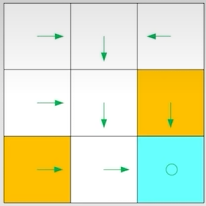

#### 策略的数学表示

对于状态 $s_1$，策略 $\pi$ 可以表示为：

$$
\begin{align*}
\pi(a_1 \mid s_1) &= 0 \\
\pi(a_2 \mid s_1) &= 1 \\
\pi(a_3 \mid s_1) &= 0 \\
\pi(a_4 \mid s_1) &= 0 \\
\pi(a_5 \mid s_1) &= 0
\end{align*}
$$

所有策略概率之和为 1。

#### 策略的表格表示

以下表格展示了一个随机策略的示例：

| State | $a_1$ (up) | $a_2$ (right) | $a_3$ (down) | $a_4$ (left) | $a_5$ (unchanged) |
|:-----:|:----------:|:-------------:|:------------:|:------------:|:-----------------:|
| $s_1$ |     0      |      0.5      |      0.5     |      0       |         0         |
| $s_2$ |     0      |       0       |      1       |      0       |         0         |
| $s_3$ |     0      |       0       |      0       |      1       |         0         |
| $s_4$ |     0      |       1       |      0       |      0       |         0         |
| $s_5$ |     0      |       0       |      1       |      0       |         0         |
| $s_6$ |     0      |       0       |      1       |      0       |         0         |
| $s_7$ |     0      |       1       |      0       |      0       |         0         |
| $s_8$ |     0      |       1       |      0       |      0       |         0         |
| $s_9$ |     0      |       0       |      0       |      0       |         1         |